In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#importing dataset

In [3]:
df = pd.read_csv(r'C:\Users\ysmor\Downloads\walmart\Walmart_Store_sales.csv')

In [4]:
#checking shape and stats of dateset

In [5]:
df.shape


(6435, 8)

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,1046964.878,0.070,60.664,3.359,171.578,7.999
std,12.988,564366.622,0.255,18.445,0.459,39.357,1.876
min,1.000,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,1420158.660,0.000,74.940,3.735,212.743,8.622
max,45.000,3818686.450,1.000,100.140,4.468,227.233,14.313


In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


In [8]:
#checking for null values

In [9]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#changing date column data type to datetime

In [12]:
df.Date.dtype


dtype('O')

In [13]:
df['date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [14]:
df.drop('Date', axis =1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date
0,1,1643690.900,0,42.310,2.572,211.096,8.106,2010-02-05
1,1,1641957.440,1,38.510,2.548,211.242,8.106,2010-02-12
2,1,1611968.170,0,39.930,2.514,211.289,8.106,2010-02-19
3,1,1409727.590,0,46.630,2.561,211.320,8.106,2010-02-26
4,1,1554806.680,0,46.500,2.625,211.350,8.106,2010-03-05
...,...,...,...,...,...,...,...,...
6430,45,713173.950,0,64.880,3.997,192.014,8.684,2012-09-28
6431,45,733455.070,0,64.890,3.985,192.170,8.667,2012-10-05
6432,45,734464.360,0,54.470,4.000,192.327,8.667,2012-10-12
6433,45,718125.530,0,56.470,3.969,192.331,8.667,2012-10-19


In [15]:
df.date.dtype

dtype('<M8[ns]')

In [16]:
#calculating total sales for the duration by summing weekly sales with respect to store and plotting it 

In [17]:
sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().to_frame().reset_index()

sales_per_store


,Store,Weekly_Sales
0,1,222402808.850
1,2,275382440.980
2,3,57586735.070
3,4,299543953.380
4,5,45475688.900
5,6,223756130.640
6,7,81598275.140
7,8,129951181.130
8,9,77789218.990
9,10,271617713.890


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

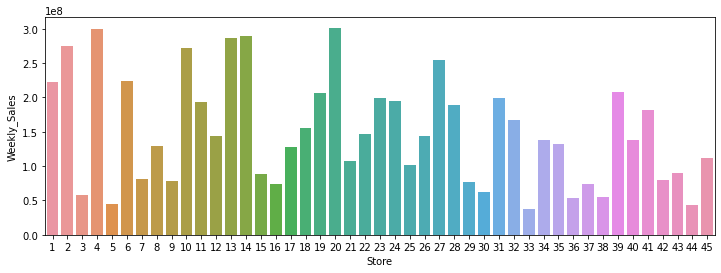

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(x = sales_per_store['Store'], y = sales_per_store['Weekly_Sales'])

In [19]:
#calculating the deaviation in sales for each store

In [20]:
std_dev_storewise = df.groupby('Store')['Weekly_Sales'].std().reset_index()
std_dev_storewise.sort_values(by = 'Weekly_Sales', ascending = False)

,Store,Weekly_Sales
13,14,317569.949
9,10,302262.063
19,20,275900.563
3,4,266201.442
12,13,265506.996
22,23,249788.038
26,27,239930.136
1,2,237683.695
38,39,217466.455
5,6,212525.856


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

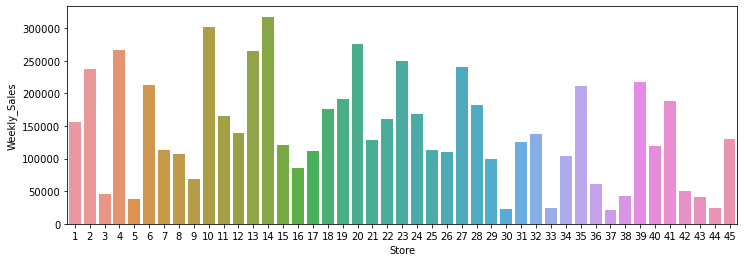

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(x = std_dev_storewise['Store'], y = std_dev_storewise['Weekly_Sales'])

In [22]:
#calculating average sales for each store

In [23]:
mean_storewise = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
mean_storewise.sort_values(by = 'Weekly_Sales', ascending = False)

,Store,Weekly_Sales
19,20,2107676.870
3,4,2094712.961
13,14,2020978.401
12,13,2003620.306
1,2,1925751.336
9,10,1899424.573
26,27,1775216.202
5,6,1564728.186
0,1,1555264.398
38,39,1450668.129


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

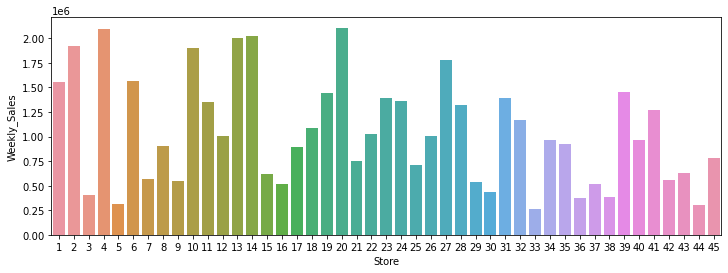

In [24]:
plt.figure(figsize=(12,4))
sns.barplot(x = mean_storewise['Store'], y = mean_storewise['Weekly_Sales'])

In [25]:
#calculating covariance

In [26]:
covariance = std_dev_storewise['Weekly_Sales']/mean_storewise['Weekly_Sales']

covariance =covariance.to_frame().reset_index()

In [27]:
store = sales_per_store['Store']
covariance.insert(0, 'Store', store)



In [28]:
covariance = covariance.drop('index', axis = 1)

In [29]:
covariance.sort_values(by = 'Weekly_Sales',  ascending = False)

,Store,Weekly_Sales
34,35,0.230
6,7,0.197
14,15,0.193
28,29,0.184
22,23,0.180
20,21,0.170
44,45,0.166
15,16,0.165
17,18,0.163
35,36,0.163


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

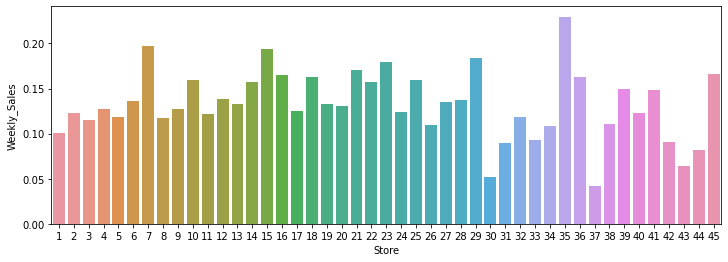

In [30]:
plt.figure(figsize=(12,4))
sns.barplot(x = covariance['Store'], y = covariance['Weekly_Sales'])

In [31]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684,2012-09-28
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667,2012-10-05
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667,2012-10-12
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667,2012-10-19
6434,45,26-10-2012,760281.430,0,58.850,3.882,192.309,8.667,2012-10-26


In [32]:
#dropping date column with object data type

In [33]:
df = df.drop('Date' , axis = 1)

In [34]:
df.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date
6430,45,713173.950,0,64.880,3.997,192.014,8.684,2012-09-28
6431,45,733455.070,0,64.890,3.985,192.170,8.667,2012-10-05
6432,45,734464.360,0,54.470,4.000,192.327,8.667,2012-10-12
6433,45,718125.530,0,56.470,3.969,192.331,8.667,2012-10-19
6434,45,760281.430,0,58.850,3.882,192.309,8.667,2012-10-26


In [35]:
#adding month column 

In [36]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,month,year
0,1,1643690.900,0,42.310,2.572,211.096,8.106,2010-02-05,2,2010
1,1,1641957.440,1,38.510,2.548,211.242,8.106,2010-02-12,2,2010
2,1,1611968.170,0,39.930,2.514,211.289,8.106,2010-02-19,2,2010
3,1,1409727.590,0,46.630,2.561,211.320,8.106,2010-02-26,2,2010
4,1,1554806.680,0,46.500,2.625,211.350,8.106,2010-03-05,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.950,0,64.880,3.997,192.014,8.684,2012-09-28,9,2012
6431,45,733455.070,0,64.890,3.985,192.170,8.667,2012-10-05,10,2012
6432,45,734464.360,0,54.470,4.000,192.327,8.667,2012-10-12,10,2012
6433,45,718125.530,0,56.470,3.969,192.331,8.667,2012-10-19,10,2012


In [37]:
#segregating data into quarters

In [38]:
q1_2010 = df.loc[(df.year == 2010) & (df.month <= 3) ]


q2_2010 = df.loc[(df.year == 2010) & (df.month <= 6 ) & (df.month >= 4) ]


q3_2010 = df.loc[(df.year == 2010) & (df.month <= 9 ) & (df.month >= 7) ]


q4_2010 = df.loc[(df.year == 2010) & (df.month <= 12 ) & (df.month >= 10) ]




q1_2011 = df.loc[(df.year == 2011) & (df.month <= 3) ]


q2_2011 = df.loc[(df.year == 2011) & (df.month <= 6 ) & (df.month >= 4) ]


q3_2011 = df.loc[(df.year == 2011) & (df.month <= 9 ) & (df.month >= 7) ]


q4_2011 = df.loc[(df.year == 2011) & (df.month <= 12 ) & (df.month >= 10) ]



q1_2012 = df.loc[(df.year == 2012) & (df.month <= 3) ]


q2_2012 = df.loc[(df.year == 2012) & (df.month <= 6 ) & (df.month >= 4) ]


q3_2012 = df.loc[(df.year == 2012) & (df.month <= 9 ) & (df.month >= 7) ]


q4_2012 = df.loc[(df.year == 2012) & (df.month <= 12 ) & (df.month >= 10) ]



In [39]:
#calcualting quarterly growth from Q2 to Q3 for the year 2012

In [40]:
q4_sum = q4_2012.groupby('Store')['Weekly_Sales'].sum()
q3_sum = q3_2012.groupby('Store')['Weekly_Sales'].sum()
q2_sum = q2_2012.groupby('Store')['Weekly_Sales'].sum()

In [41]:
growth = (q3_sum - q2_sum) /  q2_sum * 100

In [42]:
growth = growth.reset_index()

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

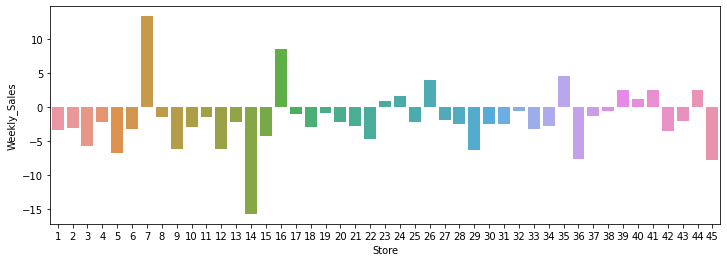

In [43]:
plt.figure(figsize=(12,4))
sns.barplot(x = growth['Store'], y = growth['Weekly_Sales'])

In [ ]:
#calcualting which holiday season has the highest number of sales

In [46]:
holiday_sales = df.groupby('Holiday_Flag')
holiday_sale_df = holiday_sales.get_group(1)
holiday_sale_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,month,year
1,1,1641957.440,1,38.510,2.548,211.242,8.106,2010-02-12,2,2010
31,1,1507460.690,1,78.690,2.565,211.495,7.787,2010-09-10,9,2010
42,1,1955624.110,1,64.520,2.735,211.748,7.838,2010-11-26,11,2010
47,1,1367320.010,1,48.430,2.943,211.405,7.838,2010-12-31,12,2010
53,1,1649614.930,1,36.390,3.022,212.937,7.742,2011-02-11,2,2011
...,...,...,...,...,...,...,...,...,...,...
6375,45,746129.560,1,71.480,3.738,186.674,8.625,2011-09-09,9,2011
6386,45,1170672.940,1,48.710,3.492,188.350,8.523,2011-11-25,11,2011
6391,45,869403.630,1,37.790,3.389,189.062,8.523,2011-12-30,12,2011
6397,45,803657.120,1,37.000,3.640,189.708,8.424,2012-02-10,2,2012


In [60]:
superbowl = holiday_sale_df.loc[df['month'] == 2]
superbowl_sales =superbowl.groupby('Store')['Weekly_Sales'].sum().reset_index()

labourday = holiday_sale_df.loc[df['month'] == 9]
labourday_sales = labourday.groupby('Store')['Weekly_Sales'].sum().reset_index()

thanksgiving = holiday_sale_df.loc[df['month'] == 11]
thanksgiving_sales = thanksgiving.groupby('Store')['Weekly_Sales'].sum().reset_index()

christmas = holiday_sale_df.loc[df['month'] == 12]
christmas_sales = christmas.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [63]:
hs = holiday_sale_df.groupby('month')['Weekly_Sales'].mean().reset_index()
hs


,month,Weekly_Sales
0,2,1079127.988
1,9,1042427.294
2,11,1471273.428
3,12,960833.112


[Text(0, 0, 'Superbowl'),
 Text(1, 0, 'Labour Day'),
 Text(2, 0, 'Thanksgiving'),
 Text(3, 0, 'Christmas')]

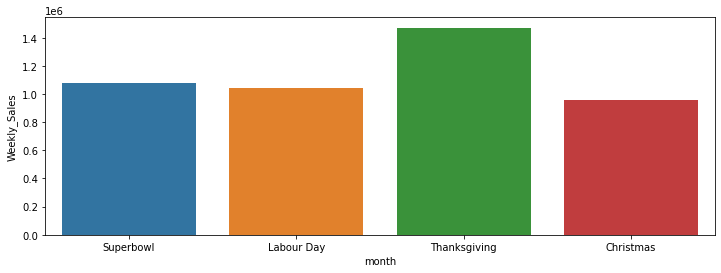

In [65]:
plt.figure(figsize=(12,4))
holiday_sales_plot = sns.barplot(x = hs['month'], y = hs['Weekly_Sales'])
holiday_sales_plot.set_xticklabels(['Superbowl','Labour Day','Thanksgiving','Christmas'])


